# CSCI 6951 Data Warehousing and Data Mining
## Lab - The KDD Process
Experiment 1:  Attribute Selection - A simple approach 
 Attempting to build an efficient data model is an exercise in futility when presented with a wealth of irrelevant attributes. It is to our advantage to eliminate most or all irrelevant attributes prior to building a model. We have the option of developing our own attribute selection techniques or using one or more offered by the sklearn.  
Let’s investigate a simple attribute selection method for supervised learning. Our experiment uses a dataset holding information about individuals who were either accepted or rejected when they applied for a credit card. The dataset contains 690 instances, 307 of which represent individuals who were approved to receive a credit card. The remaining 383 individuals had their credit card applications rejected. We want to decide on the best set of attributes defining the classes contained in the data. Stated another way, we wish to test the possibility of building an accurate supervised learner model with a subset of attributes taken from the data.  
The attributes and values have been mapped to a set of meaningless symbols to protect the confidentiality of the data. However, because the mapping is consistent, we should be able to apply data mining to analyze the dataset.  


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [2]:
df = pd.read_csv('weather.csv')
df

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [3]:
lb_enc = LabelEncoder()
df['outlook'] = lb_enc.fit_transform(df['outlook'])
df['windy'] = lb_enc.fit_transform(df['windy'])
df['play'] = lb_enc.fit_transform(df['play'])
#df.to_csv("weather_numeric.csv")
df

,outlook,temperature,humidity,windy,play
0,2,85,85,0,0
1,2,80,90,1,0
2,0,83,86,0,1
3,1,70,96,0,1
4,1,68,80,0,1
5,1,65,70,1,0
6,0,64,65,1,1
7,2,72,95,0,0
8,2,69,70,0,1
9,1,75,80,0,1


In [4]:
clf = tree.DecisionTreeClassifier()
X = df[['outlook','temperature','humidity','windy']]
y = df['play']
clf = clf.fit(X,y)
y_pred = clf.predict(X)
y_pred 

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [5]:
from sklearn.tree import export_text
r=export_text(clf,feature_names=['outlook',\
                                 'temperature',\
                                'humidity','windy'])
print(r)

|--- outlook <= 0.50
|   |--- class: 1
|--- outlook >  0.50
|   |--- humidity <= 82.50
|   |   |--- temperature <= 66.50
|   |   |   |--- class: 0
|   |   |--- temperature >  66.50
|   |   |   |--- class: 1
|   |--- humidity >  82.50
|   |   |--- temperature <= 70.50
|   |   |   |--- class: 1
|   |   |--- temperature >  70.50
|   |   |   |--- class: 0



In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy:",accuracy_score(y,y_pred))
print("Confusion matrix:\n",confusion_matrix(y,y_pred))
print("Classification Report:\n",classification_report(y,y_pred,target_names=['no','yes']))

Accuracy: 1.0
Confusion matrix:
 [[5 0]
 [0 9]]
Classification Report:
               precision    recall  f1-score   support

          no       1.00      1.00      1.00         5
         yes       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [7]:
test_df = pd.read_csv('weather.test.csv')
test_df

,outlook,temperature,humidity,windy,play
0,sunny,90,80,True,no
1,sunny,70,89,True,yes
2,overcast,83,86,False,no
3,rainy,70,96,False,yes
4,rainy,70,80,False,yes
5,rainy,63,75,True,no


In [8]:
#lb_enc = LabelEncoder()
test_df['outlook'] = lb_enc.fit_transform(test_df['outlook'])
test_df['windy'] = lb_enc.fit_transform(test_df['windy'])
test_df['play'] = lb_enc.fit_transform(test_df['play'])
test_df.to_csv("weather_numeric.test.csv")
test_df

,outlook,temperature,humidity,windy,play
0,2,90,80,1,0
1,2,70,89,1,1
2,0,83,86,0,0
3,1,70,96,0,1
4,1,70,80,0,1
5,1,63,75,1,0


In [9]:
X_test = test_df[['outlook','temperature','humidity','windy']]
y_test = test_df['play']
y_test_pred = clf.predict(X_test)
print(y_test_pred)
print(list(y_test)) 

[1 1 1 1 1 0]
[0, 1, 0, 1, 1, 0]


In [10]:
y = y_test
y_pred = y_test_pred
print("Accuracy:",accuracy_score(y,y_pred))
print("Confusion matrix:\n",confusion_matrix(y,y_pred))
print("Classification Report:\n",classification_report(y,y_pred,target_names=['no','yes']))

Accuracy: 0.6666666666666666
Confusion matrix:
 [[1 2]
 [0 3]]
Classification Report:
               precision    recall  f1-score   support

          no       1.00      0.33      0.50         3
         yes       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



In [12]:
df = pd.read_csv("CreditScreening.csv")
df

,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen,fifteen,class
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43,560,1
2,a,24.5,0.500,u,g,q,h,1.500,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,36.75,0.125,y,p,c,v,1.500,f,f,0,t,g,232,113,1
686,b,21.25,1.500,u,g,w,v,1.500,f,f,0,f,g,150,8,1
687,a,18.08,0.375,l,gg,cc,ff,10.000,f,f,0,t,s,300,0,1
688,a,33.67,0.375,u,g,cc,v,0.375,f,f,0,f,g,300,44,1


Build a decision tree classifier and evaluate it.

In [13]:
lb_enc = LabelEncoder()
df['one'] = lb_enc.fit_transform(df['one'])
df['four'] = lb_enc.fit_transform(df['four'])
df['five'] = lb_enc.fit_transform(df['five'])
df['six'] = lb_enc.fit_transform(df['six'])
df['seven'] = lb_enc.fit_transform(df['seven'])
df['nine'] = lb_enc.fit_transform(df['nine'])
df['ten'] = lb_enc.fit_transform(df['ten'])
df['twelve'] = lb_enc.fit_transform(df['twelve'])
df['thirteen'] = lb_enc.fit_transform(df['thirteen'])
df.to_csv("creditNnumeric.csv")
df=df.replace('?', np.NaN)
df

,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen,fifteen,class
0,2,30.83,0.000,2,1,13,8,1.250,1,1,1,0,0,202,0,1
1,1,58.67,4.460,2,1,11,4,3.040,1,1,6,0,0,43,560,1
2,1,24.5,0.500,2,1,11,4,1.500,1,0,0,0,0,280,824,1
3,2,27.83,1.540,2,1,13,8,3.750,1,1,5,1,0,100,3,1
4,2,20.17,5.625,2,1,13,8,1.710,1,0,0,0,2,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2,36.75,0.125,3,3,2,8,1.500,0,0,0,1,0,232,113,1
686,2,21.25,1.500,2,1,13,8,1.500,0,0,0,0,0,150,8,1
687,1,18.08,0.375,1,2,3,3,10.000,0,0,0,1,2,300,0,1
688,1,33.67,0.375,2,1,3,8,0.375,0,0,0,0,0,300,44,1


In [14]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.NAN, \
                    strategy='mean')
imp.fit(df)
columns = df.columns
df = pd.DataFrame(imp.transform(df))
df.columns=columns
df

,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen,fifteen,class
0,2.0,30.83,0.000,2.0,1.0,13.0,8.0,1.250,1.0,1.0,1.0,0.0,0.0,202.0,0.0,1.0
1,1.0,58.67,4.460,2.0,1.0,11.0,4.0,3.040,1.0,1.0,6.0,0.0,0.0,43.0,560.0,1.0
2,1.0,24.50,0.500,2.0,1.0,11.0,4.0,1.500,1.0,0.0,0.0,0.0,0.0,280.0,824.0,1.0
3,2.0,27.83,1.540,2.0,1.0,13.0,8.0,3.750,1.0,1.0,5.0,1.0,0.0,100.0,3.0,1.0
4,2.0,20.17,5.625,2.0,1.0,13.0,8.0,1.710,1.0,0.0,0.0,0.0,2.0,120.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2.0,36.75,0.125,3.0,3.0,2.0,8.0,1.500,0.0,0.0,0.0,1.0,0.0,232.0,113.0,1.0
686,2.0,21.25,1.500,2.0,1.0,13.0,8.0,1.500,0.0,0.0,0.0,0.0,0.0,150.0,8.0,1.0
687,1.0,18.08,0.375,1.0,2.0,3.0,3.0,10.000,0.0,0.0,0.0,1.0,2.0,300.0,0.0,1.0
688,1.0,33.67,0.375,2.0,1.0,3.0,8.0,0.375,0.0,0.0,0.0,0.0,0.0,300.0,44.0,1.0


In [15]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:,:-1], df.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(\
         X, y, test_size=0.2, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
#clf.feature_importances_

In [16]:
y_pred = clf.predict(X_train)

print("Accuracy:",accuracy_score(y_train,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_train,y_pred))
print("Classification Report:\n",classification_report(y_train,y_pred,target_names=['no','yes']))

Accuracy: 1.0
Confusion matrix:
 [[306   0]
 [  0 246]]
Classification Report:
               precision    recall  f1-score   support

          no       1.00      1.00      1.00       306
         yes       1.00      1.00      1.00       246

    accuracy                           1.00       552
   macro avg       1.00      1.00      1.00       552
weighted avg       1.00      1.00      1.00       552



In [17]:
y_pred = clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred,target_names=['no','yes']))

Accuracy: 0.7681159420289855
Confusion matrix:
 [[60 17]
 [15 46]]
Classification Report:
               precision    recall  f1-score   support

          no       0.80      0.78      0.79        77
         yes       0.73      0.75      0.74        61

    accuracy                           0.77       138
   macro avg       0.77      0.77      0.77       138
weighted avg       0.77      0.77      0.77       138



In [18]:
from sklearn.tree import export_text
print(list(columns)[:-1])
r=export_text(clf,feature_names=list(columns)[:-1])
print(r)

['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen']
|--- nine <= 0.50
|   |--- four <= 1.50
|   |   |--- two <= 30.08
|   |   |   |--- class: 1.0
|   |   |--- two >  30.08
|   |   |   |--- two <= 36.08
|   |   |   |   |--- class: 0.0
|   |   |   |--- two >  36.08
|   |   |   |   |--- class: 1.0
|   |--- four >  1.50
|   |   |--- three <= 0.15
|   |   |   |--- fourteen <= 480.00
|   |   |   |   |--- six <= 3.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- six >  3.00
|   |   |   |   |   |--- one <= 0.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- one >  0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- fourteen >  480.00
|   |   |   |   |--- class: 1.0
|   |   |--- three >  0.15
|   |   |   |--- six <= 13.50
|   |   |   |   |--- two <= 33.62
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- two >  33.62
|   |   |   |   |   |--- three <= 0.40
|   |   |   

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)

clf = clf.fit(X_train, y_train.values.ravel())
#clf.feature_importances_

In [39]:
y_pred = clf.predict(X_train)

print("Accuracy:",accuracy_score(y_train,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_train,y_pred))
print("Classification Report:\n",classification_report(y_train,y_pred,target_names=['no','yes']))

Accuracy: 1.0
Confusion matrix:
 [[306   0]
 [  0 246]]
Classification Report:
               precision    recall  f1-score   support

          no       1.00      1.00      1.00       306
         yes       1.00      1.00      1.00       246

    accuracy                           1.00       552
   macro avg       1.00      1.00      1.00       552
weighted avg       1.00      1.00      1.00       552



In [40]:
y_pred = clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred,target_names=['no','yes']))

Accuracy: 0.9130434782608695
Confusion matrix:
 [[73  4]
 [ 8 53]]
Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.95      0.92        77
         yes       0.93      0.87      0.90        61

    accuracy                           0.91       138
   macro avg       0.92      0.91      0.91       138
weighted avg       0.91      0.91      0.91       138



In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf = svm.SVC()
clf = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5,2),\
                    random_state=1, solver='lbfgs')
clf = DecisionTreeClassifier(random_state=0)


Text(0, 0.5, 'impurities')

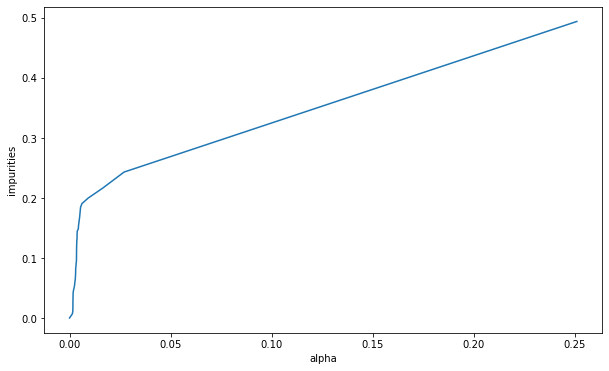

In [42]:
import matplotlib.pyplot as plt
path=clf.cost_complexity_pruning_path(X_train,y_train)
#print(path)
ccp_alphas, impu = path.ccp_alphas, path.impurities
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas,impu)
plt.xlabel("alpha")
plt.ylabel("impurities")

In [43]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0,\
                                      ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)

Text(0, 0.5, 'total depth')

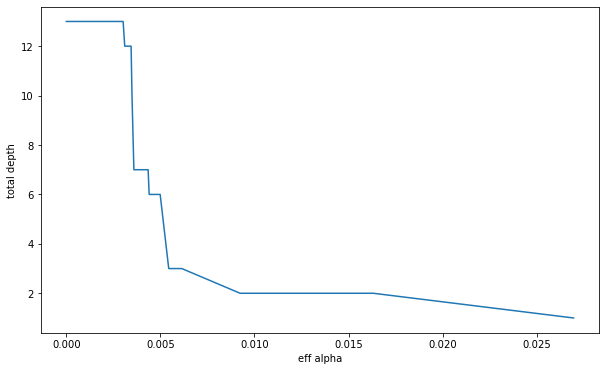

In [44]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas[:-1],tree_depths[:-1])
plt.xlabel("eff alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'accuracy')

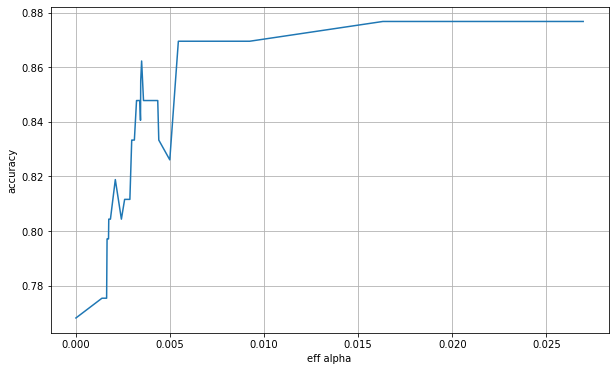

In [45]:
from sklearn.metrics import accuracy_score
acc_scores = [accuracy_score(y_test,\
                              clf.predict(X_test))\
                                for clf in clfs]
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(ccp_alphas[:-1],acc_scores[:-1])
plt.xlabel("eff alpha")
plt.ylabel("accuracy")

In [49]:

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train.values.ravel())
clf.feature_importances_

array([0.02387103, 0.0583842 , 0.05812803, 0.02413432, 0.01898219,
       0.05431027, 0.03106445, 0.06396838, 0.38433591, 0.0965958 ,
       0.0389928 , 0.01832197, 0.01518477, 0.06431129, 0.04941459])

In [50]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X.values)
X_new

array([[1., 1.],
       [1., 1.],
       [1., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [1., 1.]])